In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
train = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
train.head()
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
def frequency(variable):
    var = train[variable]
    varValue =  var.value_counts()
    
    plt.figure(figsize = (12,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    
    

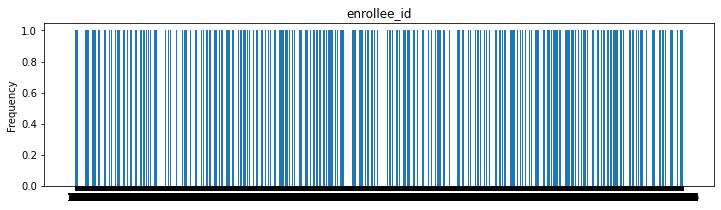

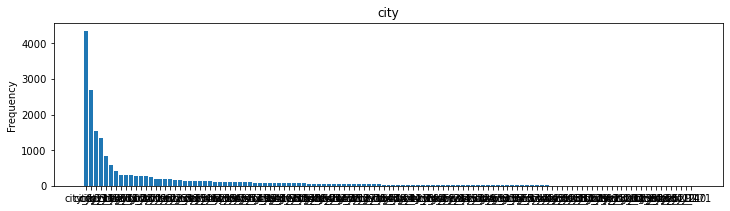

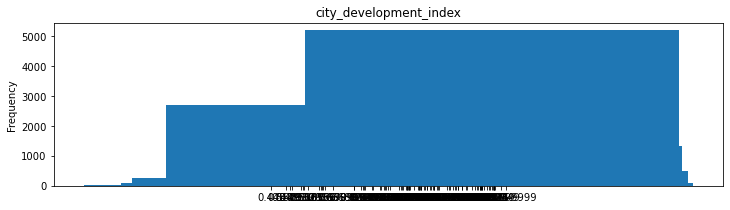

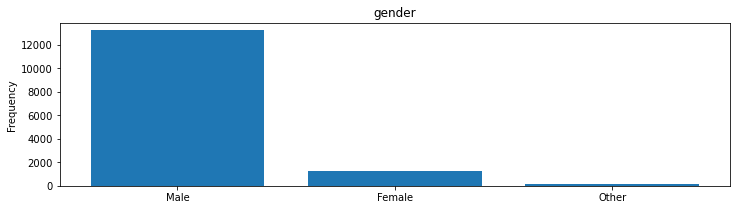

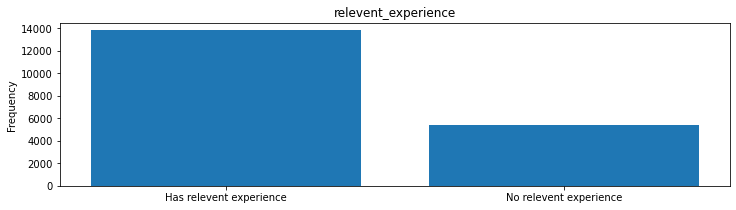

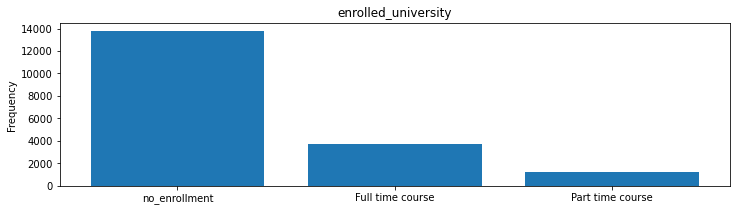

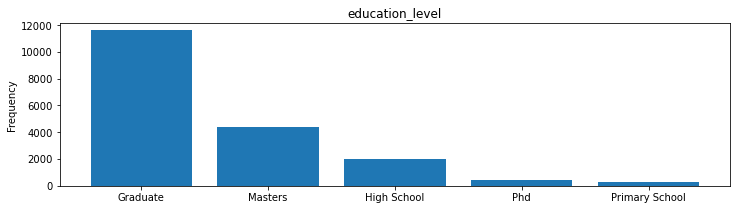

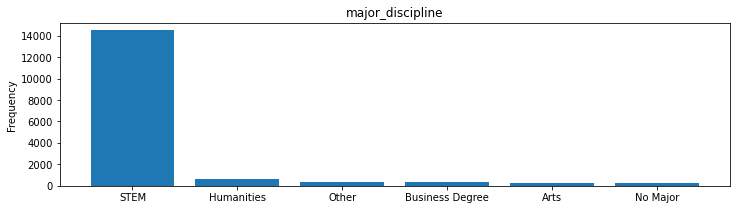

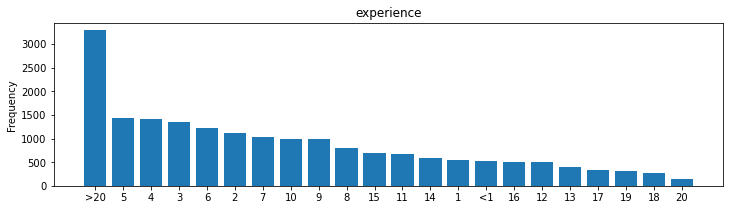

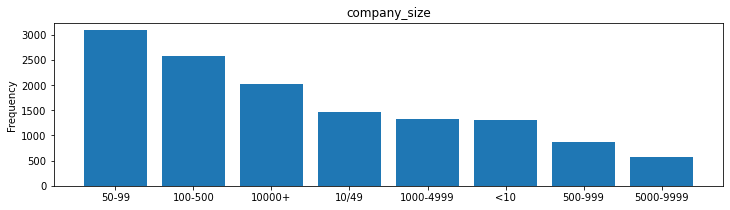

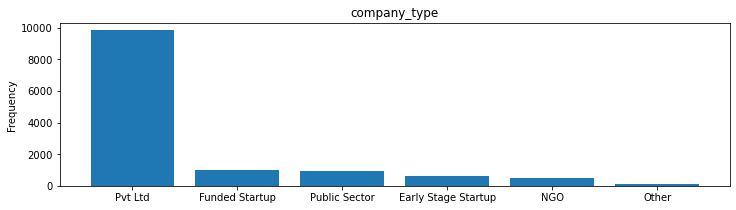

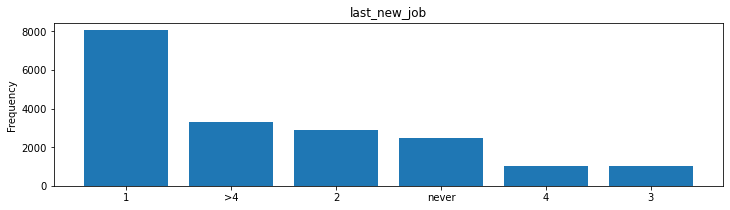

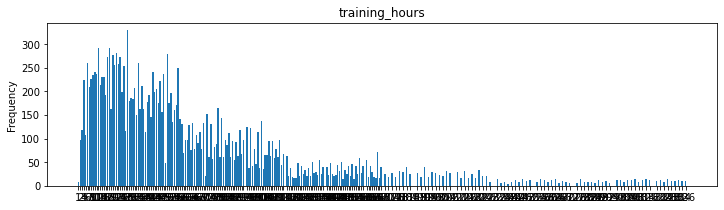

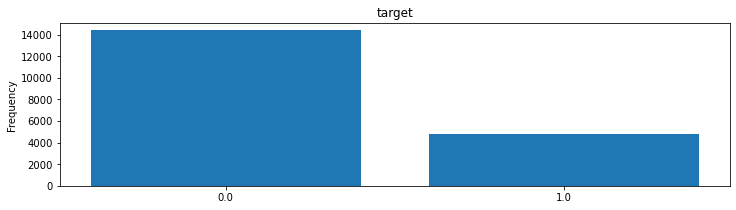

In [7]:
for variable in train.columns:
    frequency(variable)

In [8]:
train.corr()['target']

enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
Name: target, dtype: float64

In [9]:
import seaborn as sns 
def plotbars(df,features):
    for x in features:
        g = sns.factorplot(x=x, y='target',data =df,kind = 'bar')
        g.set_ylabels('Targeted to change')
        plt.show
    

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


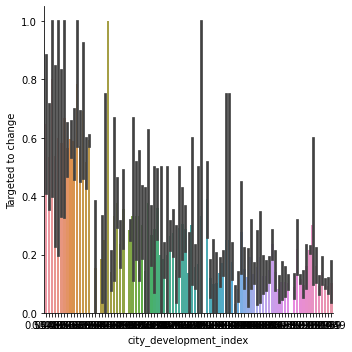

In [10]:
plotbars(train,['city_development_index'])

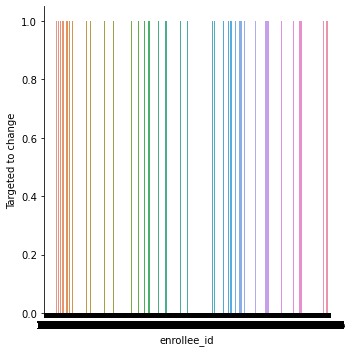

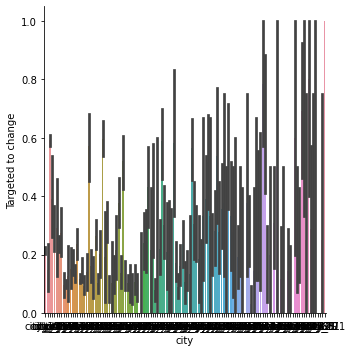

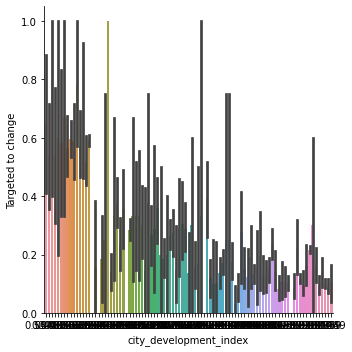

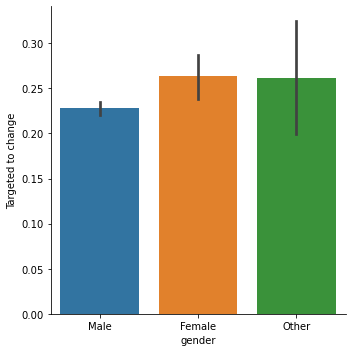

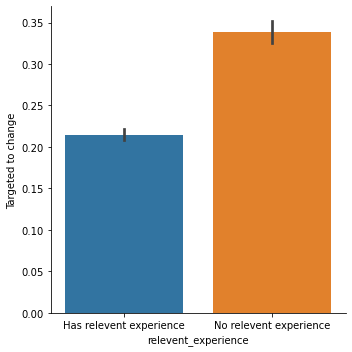

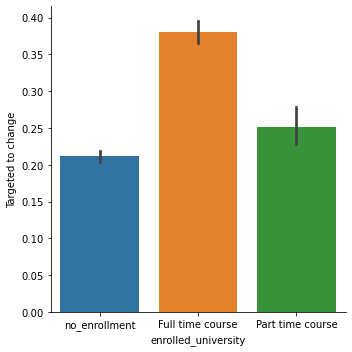

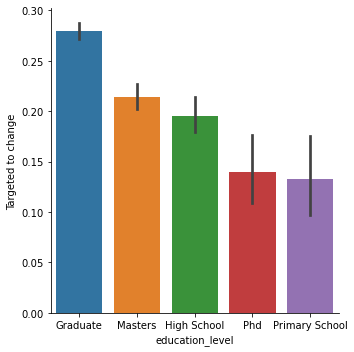

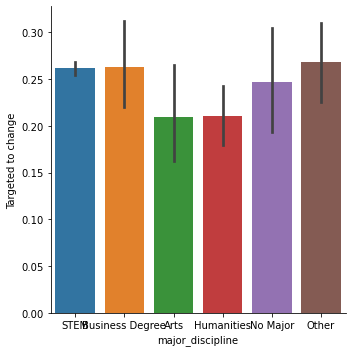

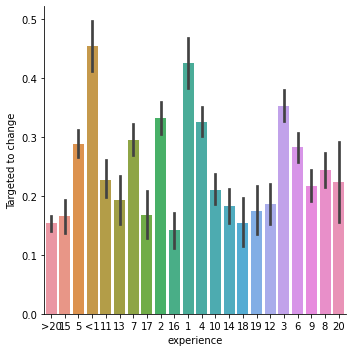

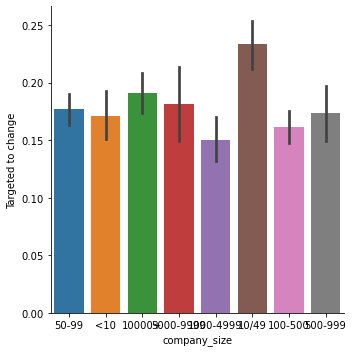

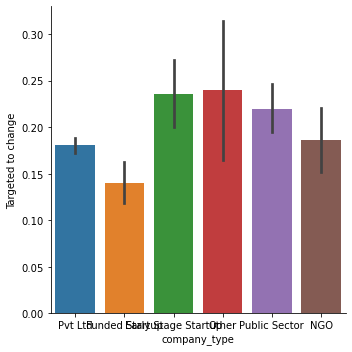

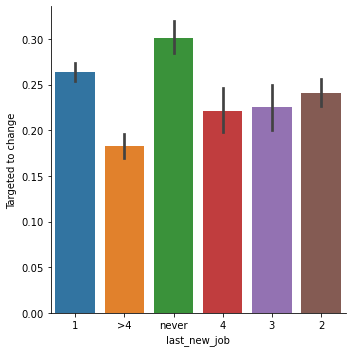

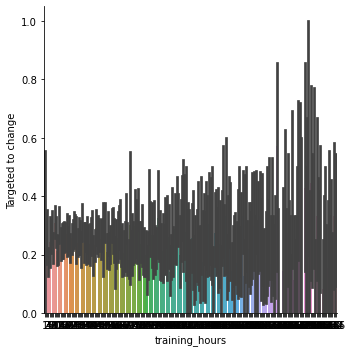

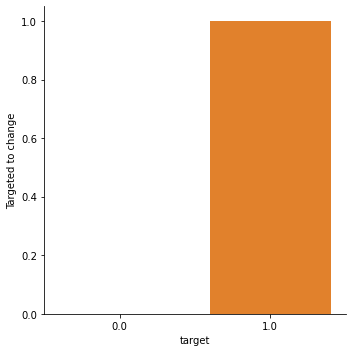

In [11]:
plotbars(train,train.columns)

In [12]:
def boxplotting(df, feature):
    sns.boxplot(data =df ,x = feature)
    plt.show()

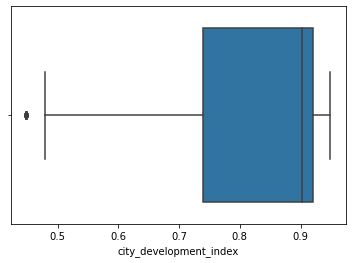

In [13]:
boxplotting(train ,'city_development_index')

> # Data preprocessing  

In [14]:
train['gender'].replace(to_replace = ['Male','Female', 'Other'],value = [0,1,2], inplace=True)

In [15]:
train['education_level'].replace(to_replace = ['High School', 'Graduate','Masters','Phd','Primary School'], value =[0,1,2,3,4], inplace =True)

In [16]:
train['relevent_experience'].replace(to_replace = ['Has relevent experience', 'No relevent experience'], value = [0,1], inplace =True)

In [17]:
train['enrolled_university'].replace(to_replace = ['no_enrollment','Full time course','Part time course'], value =[0,1,2],inplace = True)

In [18]:
train['major_discipline'].replace(to_replace =['STEM','Business Degree','Humanities','Arts','No Major','Other'], value =[0,1,2,3,4,5],inplace = True)


In [19]:
train['company_type'].replace(to_replace = ['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other','Public Sector', 'NGO'], value = [0,1,2,3,4,5],inplace = True)

In [20]:
train['experience'].replace(to_replace = ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4', '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'] , value = [21,15,5,0,11,13,7,17,2,16,1,4,10,14,18,19,12,3,6,9,8,20],inplace=True)

In [21]:
train['last_new_job'].replace(to_replace = ['1', '>4', 'never', '4', '3', '2'], value=[1,5,0,4,3,2], inplace =True)


In [22]:
train['company_size'].replace(to_replace =['<10','10/49','50-99',  '100-500', '500-999', '1000-4999', '5000-9999','10000+'], value=[0,1,2,3,4,5,6,7], inplace=True)

In [23]:
   
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122

In [24]:
train['city'] = train['city'].apply(city)

Filling empty values

In [25]:
train['gender'] = train['gender'].fillna(train['gender'].mean())

In [26]:
train['enrolled_university'] = train['enrolled_university'].fillna(train['enrolled_university'].mean())

In [27]:

train['education_level'] = train['education_level'].fillna(train['education_level'].mean())

In [28]:
train['major_discipline'] = train['major_discipline'].fillna(train['major_discipline'].mean())

In [29]:
train['experience'] = train['experience'].fillna(train['experience'].mean())

In [30]:
train['company_size'] = train['company_size'].fillna(train['company_size'].mean())

In [31]:
train['company_type'] = train['company_type'].fillna(train['company_type'].mean())

In [32]:
train['last_new_job'] = train['last_new_job'].fillna(train['last_new_job'].mean())

In [33]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,0.00000,0,0.000000,1.0,0.000000,21.0,3.253328,0.690966,1.0,36,1.0
1,29725,1,0.776,0.00000,1,0.000000,1.0,0.000000,15.0,2.000000,0.000000,5.0,47,0.0
2,11561,2,0.624,0.11058,1,1.000000,1.0,0.000000,5.0,3.253328,0.690966,0.0,83,0.0
3,33241,3,0.789,0.11058,1,0.327775,1.0,1.000000,0.0,3.253328,0.000000,0.0,52,1.0
4,666,4,0.767,0.00000,0,0.000000,2.0,0.000000,21.0,2.000000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,0.00000,1,0.000000,1.0,2.000000,14.0,3.253328,0.690966,1.0,42,1.0
19154,31398,0,0.920,0.00000,0,0.000000,1.0,0.000000,14.0,3.253328,0.690966,4.0,52,1.0
19155,24576,0,0.920,0.00000,0,0.000000,1.0,0.000000,21.0,2.000000,0.000000,4.0,44,0.0
19156,5756,33,0.802,0.00000,0,0.000000,0.0,0.319425,0.0,4.000000,0.000000,2.0,97,0.0


# Prediction


In [34]:
features =["enrollee_id","city","city_development_index","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours"]


In [35]:
X = train[features]
y =train['target']

In [36]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X,y)

LinearRegression()

# Test set

In [37]:
test['gender'].replace(to_replace = ['Male','Female', 'Other'],value = [0,1,2], inplace=True)
test['education_level'].replace(to_replace = ['High School', 'Graduate','Masters','Phd','Primary School'], value =[0,1,2,3,4], inplace =True)
test['relevent_experience'].replace(to_replace = ['Has relevent experience', 'No relevent experience'], value = [0,1], inplace =True)
test['enrolled_university'].replace(to_replace = ['no_enrollment','Full time course','Part time course'], value =[0,1,2],inplace = True)
test['major_discipline'].replace(to_replace =['STEM','Business Degree','Humanities','Arts','No Major','Other'], value =[0,1,2,3,4,5],inplace = True)
test['company_type'].replace(to_replace = ['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other','Public Sector', 'NGO'], value = [0,1,2,3,4,5],inplace = True)
test['experience'].replace(to_replace = ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4', '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'] , value = [21,15,5,0,11,13,7,17,2,16,1,4,10,14,18,19,12,3,6,9,8,20],inplace=True)
test['last_new_job'].replace(to_replace = ['1', '>4', 'never', '4', '3', '2'], value=[1,5,0,4,3,2], inplace =True)
test['company_size'].replace(to_replace =['<10','10/49','50-99',  '100-500', '500-999', '1000-4999', '5000-9999','10000+'], value=[0,1,2,3,4,5,6,7], inplace=True)
test['city'] = test['city'].apply(city)
test['gender'] = test['gender'].fillna(train['gender'].mean())
test['enrolled_university'] = test['enrolled_university'].fillna(test['enrolled_university'].mean())
test['education_level'] = test['education_level'].fillna(test['education_level'].mean())
test['major_discipline'] = test['major_discipline'].fillna(test['major_discipline'].mean())
test['experience'] = test['experience'].fillna(test['experience'].mean())
test['company_size'] = test['company_size'].fillna(test['company_size'].mean())
test['company_type'] = test['company_type'].fillna(test['company_type'].mean())
test['last_new_job'] = test['last_new_job'].fillna(test['last_new_job'].mean())

In [38]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,0.0,0,1.0,1.0,0.000000,9.0,0.000000,0.692977,1.0,21
1,9858,0,0.920,1.0,0,0.0,1.0,0.000000,5.0,3.182482,0.000000,1.0,98
2,31806,2,0.624,0.0,1,0.0,0.0,0.294992,0.0,3.182482,0.000000,0.0,15
3,27385,10,0.827,0.0,0,0.0,2.0,0.000000,11.0,1.000000,0.000000,1.0,39
4,27724,0,0.920,0.0,0,0.0,1.0,0.000000,21.0,7.000000,0.000000,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,0.0,1,0.0,1.0,2.000000,16.0,3.182482,4.000000,4.0,15
2125,195,36,0.897,0.0,0,0.0,2.0,0.000000,18.0,3.182482,0.692977,2.0,30
2126,31762,14,0.887,0.0,1,0.0,4.0,0.294992,3.0,3.182482,0.000000,0.0,18
2127,7873,12,0.804,0.0,0,1.0,0.0,0.294992,7.0,3.000000,4.000000,1.0,84


In [39]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error

model = CatBoostRegressor(objective='RMSE')
model.fit(X,y)

Learning rate set to 0.066018
0:	learn: 0.4265134	total: 57.9ms	remaining: 57.8s
1:	learn: 0.4213492	total: 62.9ms	remaining: 31.4s
2:	learn: 0.4167662	total: 68.3ms	remaining: 22.7s
3:	learn: 0.4125186	total: 73.6ms	remaining: 18.3s
4:	learn: 0.4082353	total: 78.2ms	remaining: 15.6s
5:	learn: 0.4047785	total: 82.6ms	remaining: 13.7s
6:	learn: 0.4018243	total: 86.7ms	remaining: 12.3s
7:	learn: 0.3992838	total: 90.9ms	remaining: 11.3s
8:	learn: 0.3965124	total: 95.5ms	remaining: 10.5s
9:	learn: 0.3943706	total: 99.5ms	remaining: 9.86s
10:	learn: 0.3923774	total: 104ms	remaining: 9.31s
11:	learn: 0.3906470	total: 108ms	remaining: 8.88s
12:	learn: 0.3890677	total: 112ms	remaining: 8.5s
13:	learn: 0.3876628	total: 117ms	remaining: 8.26s
14:	learn: 0.3863254	total: 122ms	remaining: 7.99s
15:	learn: 0.3849891	total: 126ms	remaining: 7.77s
16:	learn: 0.3837264	total: 131ms	remaining: 7.57s
17:	learn: 0.3827439	total: 136ms	remaining: 7.41s
18:	learn: 0.3817624	total: 141ms	remaining: 7.28s
19

In [40]:
predictions = model.predict(test[features])

In [41]:
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
submission.head()

,enrollee_id,target
0,32403,0.147914
1,9858,0.243645
2,31806,0.367185
3,27385,0.117085
4,27724,0.099680


In [42]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
